Connected to Python 3.12.7

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import tensorflow as tf
import keras
import warnings
warnings.filterwarnings('ignore')

## ***Import Dataset***

In [3]:
deathDS = pd.read_csv("cause_of_deaths.csv")
deathDS.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


## ***Data Exploration***

### *Causes of Death*

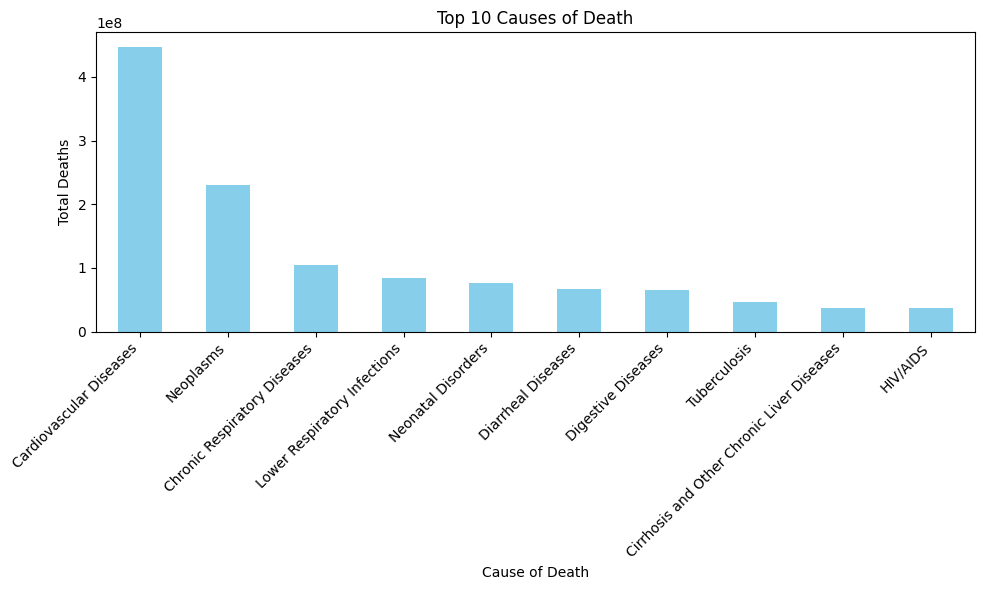

In [29]:
# Define the range of columns that represent causes of death
cause_of_death_columns = deathDS.loc[:, 'Meningitis':'Acute Hepatitis']

# Sum the total deaths for each cause within the selected columns
cause_totals = cause_of_death_columns.sum()

# Sort causes by total deaths in descending order
sorted_causes = cause_totals.sort_values(ascending=False)

# Select the top 10 causes
top_10_causes = sorted_causes.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
top_10_causes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Causes of Death')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### *Countries with The Most Deaths Over Time*

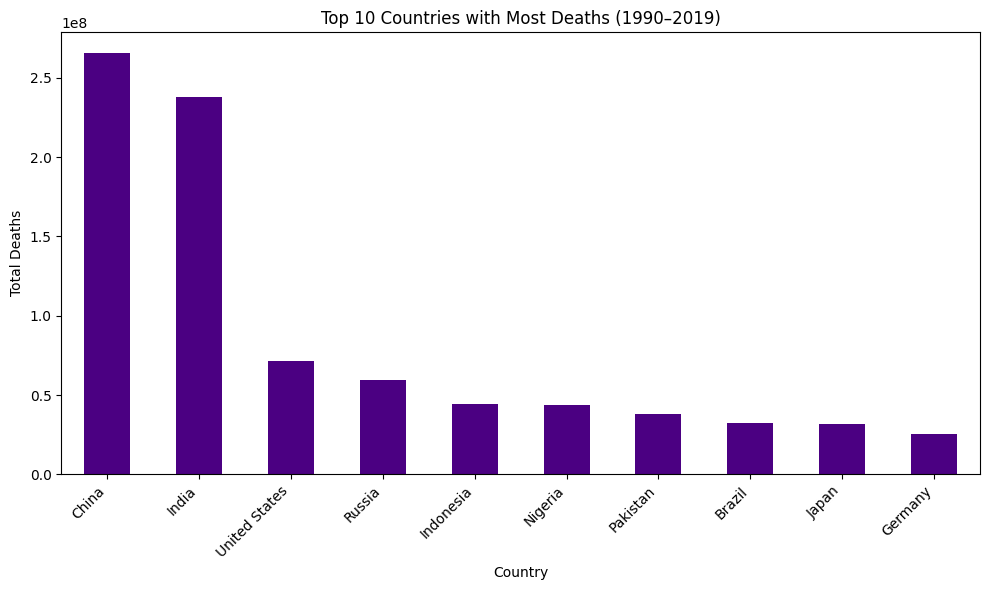

In [30]:
# Calculate total deaths for each row by summing across the disease columns
deathDS['Total_Deaths'] = deathDS.loc[:, 'Meningitis':'Acute Hepatitis'].sum(axis=1)

# Group to get the total deaths for each country
country_death_totals = deathDS.groupby('Country/Territory')['Total_Deaths'].sum()

# Sort countries by total deaths in descending order
sorted_countries = country_death_totals.sort_values(ascending=False)

# Select the top 10 countries
top_10_countries = sorted_countries.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='indigo')
plt.title('Top 10 Countries with Most Deaths (1990–2019)')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### *Total Deaths per Years*

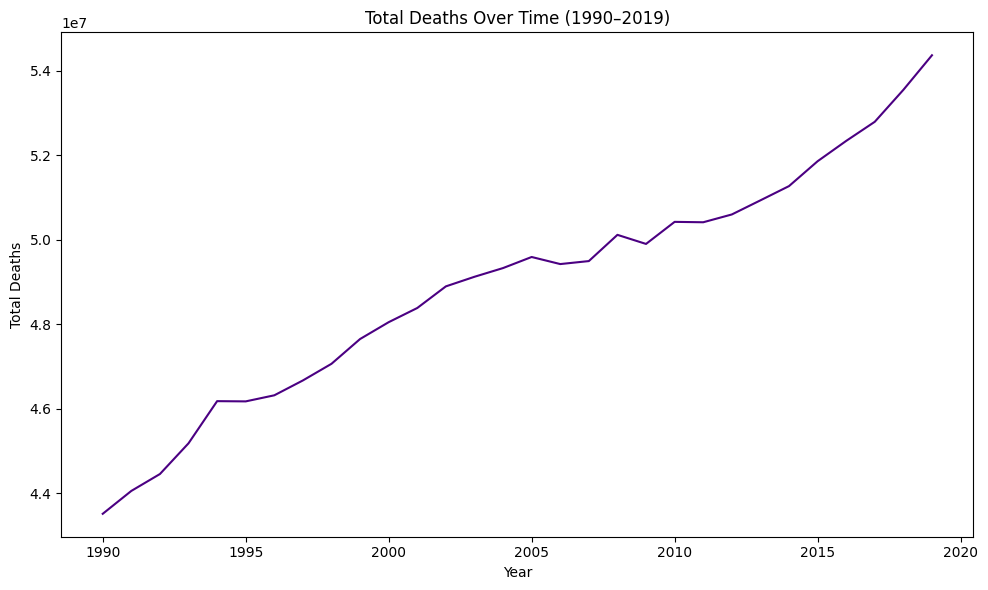

In [31]:
# Calculate total deaths for each row by summing across the disease columns
deathDS['Total_Deaths'] = deathDS.loc[:, 'Meningitis':'Acute Hepatitis'].sum(axis=1)

# Group by to get the total deaths for each country
country_death_totals = deathDS.groupby('Year')['Total_Deaths'].sum()

plt.figure(figsize=(10, 6))
country_death_totals.plot(kind='line', color='indigo')
plt.title('Total Deaths Over Time (1990–2019)')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()

### *Death Rate of Change per Year*

In [7]:
deathDS['Death_Rate_Change'] = deathDS.groupby('Country/Territory')['Total_Deaths'].pct_change() * 100

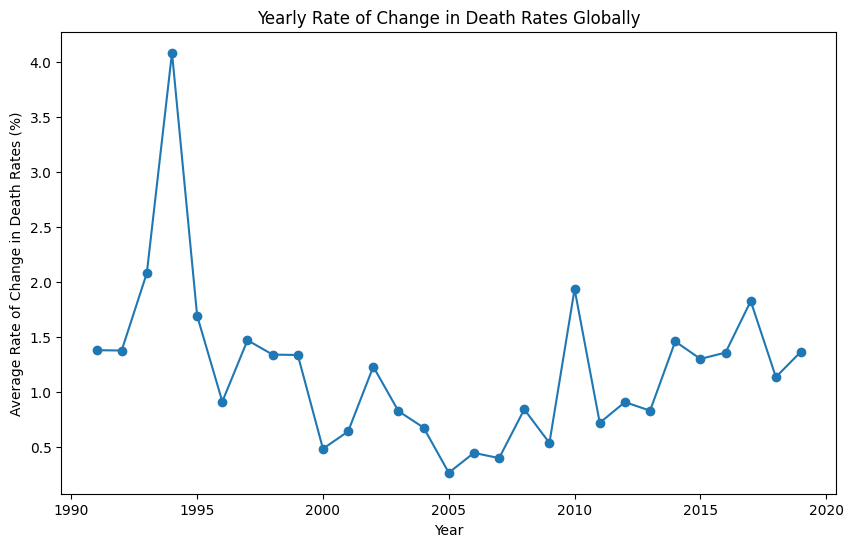

In [36]:
# Calculate the average rate of change per year (your existing code)
avg_rate_change_per_year = deathDS.groupby('Year')['Death_Rate_Change'].mean()
avg_rate_change_per_year = avg_rate_change_per_year.iloc[1:]

# Plot the Graph
plt.figure(figsize = (10, 6))
plt.plot(avg_rate_change_per_year.index, avg_rate_change_per_year.values, marker = 'o')

plt.title('Yearly Rate of Change in Death Rates Globally')
plt.xlabel('Year')
plt.ylabel('Average Rate of Change in Death Rates (%)')

plt.tight_layout
plt.show()

## ***Forecasted Visuals till 2030***

### *Predicted Increases & Decreases in The Causes of Death Globally*

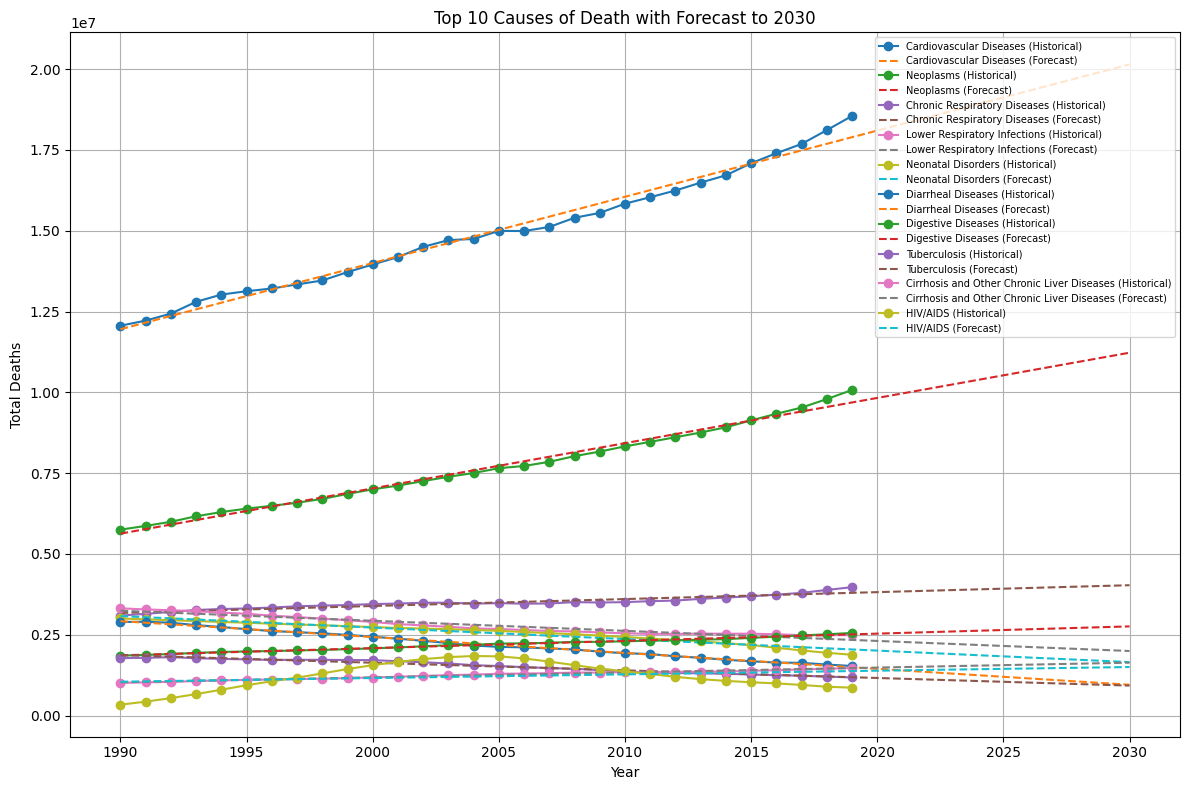

In [32]:
from sklearn.linear_model import LinearRegression

# Define the range of columns that represent causes of death
cause_of_death_columns = deathDS.loc[:, 'Meningitis':'Acute Hepatitis']

# Sum the total deaths for each cause within the selected columns
cause_totals = cause_of_death_columns.sum()

# Sort causes by total deaths in descending order
sorted_causes = cause_totals.sort_values(ascending=False)

# Select the top 10 causes
top_10_causes = sorted_causes.head(10).index.tolist()

# Initialize plot
plt.figure(figsize=(12, 8))

# Plot each cause of death's trend and forecast to 2030
for cause in top_10_causes:
    # Group by 'Year' and sum for each specific cause
    yearly_deaths = deathDS.groupby('Year')[cause].sum()
    
    # Prepare data for linear regression
    years = yearly_deaths.index.values.reshape(-1, 1)
    death_counts = yearly_deaths.values
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(years, death_counts)
    
    # Predict future deaths for this cause up to 2030
    future_years = np.arange(years.min(), 2031).reshape(-1, 1)
    predicted_deaths = model.predict(future_years)
    
    # Plot historical and predicted data
    plt.plot(yearly_deaths.index, death_counts, marker='o', label=f'{cause} (Historical)')
    plt.plot(future_years, predicted_deaths, linestyle='--', label=f'{cause} (Forecast)')

# Customize the plot
plt.title('Top 10 Causes of Death with Forecast to 2030')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(loc='upper right', fontsize=7)
plt.grid(True)
plt.tight_layout()
plt.show()

### *Predicted Increases & Decreases in Total Death per Country Till 2030*

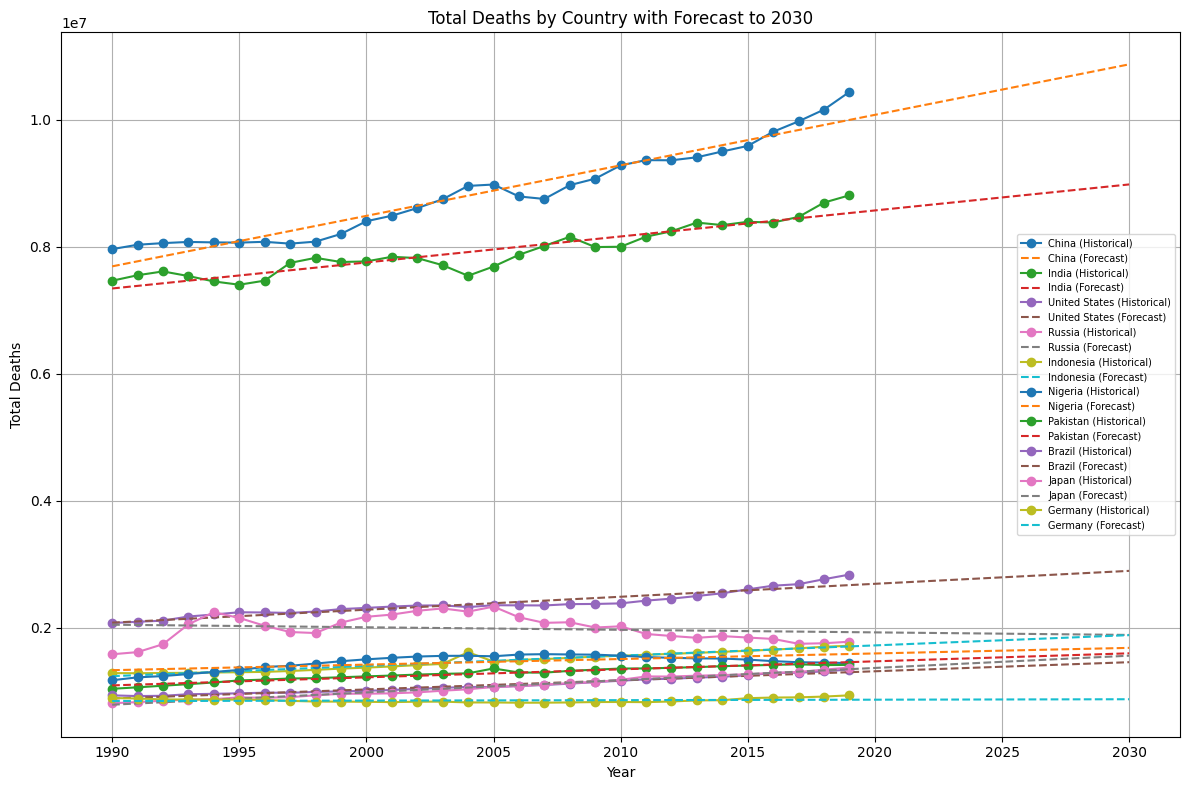

In [33]:
from sklearn.linear_model import LinearRegression

# Calculate total deaths for each row by summing across the disease columns
deathDS['Total_Deaths'] = deathDS.loc[:, 'Meningitis':'Acute Hepatitis'].sum(axis=1)

# Group by 'Country/Territory' and sum total deaths for each country
country_death_totals = deathDS.groupby('Country/Territory')['Total_Deaths'].sum()

# Sort countries by total deaths in descending order and select the top 10 countries
top_10_countries = country_death_totals.sort_values(ascending=False).head(10).index.tolist()

# Initialize the plot
plt.figure(figsize=(12, 8))

# Forecast total deaths until 2030 for each of the top 10 countries
for country in top_10_countries:
    # Filter data for the specific country
    country_data = deathDS[deathDS['Country/Territory'] == country]
    yearly_deaths = country_data.groupby('Year')['Total_Deaths'].sum()
    
    # Prepare data for linear regression
    years = yearly_deaths.index.values.reshape(-1, 1)
    deaths = yearly_deaths.values

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(years, deaths)
    
    # Predict future deaths for this country up to 2030
    future_years = np.arange(years.min(), 2031).reshape(-1, 1)
    predicted_deaths = model.predict(future_years)
    
    # Plot historical and predicted data for each country
    plt.plot(yearly_deaths.index, deaths, marker='o', label=f'{country} (Historical)')
    plt.plot(future_years, predicted_deaths, linestyle='--', label=f'{country} (Forecast)')

# Customize the plot
plt.title('Total Deaths by Country with Forecast to 2030')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(loc='right', fontsize=7)  # Adjust the fontsize as needed
plt.grid(True)
plt.tight_layout()
plt.show()


### *Predicted Increase in Total Deaths Global*

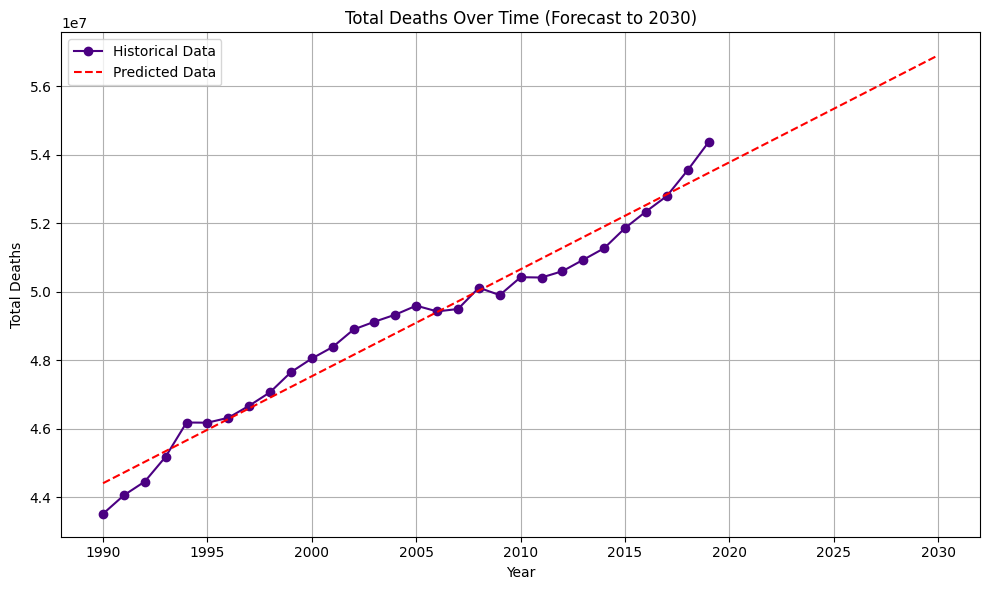

In [34]:
from sklearn.linear_model import LinearRegression

# Calculate total deaths for each row by summing across the disease columns
deathDS['Total_Deaths'] = deathDS.loc[:, 'Meningitis':'Acute Hepatitis'].sum(axis=1)

# Group by 'Year' to get the total deaths for each year
country_death_totals = deathDS.groupby('Year')['Total_Deaths'].sum()

# Prepare data for linear regression
years = country_death_totals.index.values.reshape(-1, 1)  # Reshape for sklearn compatibility
total_deaths = country_death_totals.values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(years, total_deaths)

# Predict total deaths up to 2030
future_years = np.arange(years.min(), 2031).reshape(-1, 1)
predicted_deaths = model.predict(future_years)

# Plot the historical and predicted data
plt.figure(figsize=(10, 6))
plt.plot(country_death_totals.index, country_death_totals.values, color='indigo', marker='o', label='Historical Data')
plt.plot(future_years, predicted_deaths, linestyle='--', color='red', label='Predicted Data')

plt.title('Total Deaths Over Time (Forecast to 2030)')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### *Predicted Decrease in The Rate of Change in Deaths per Year*

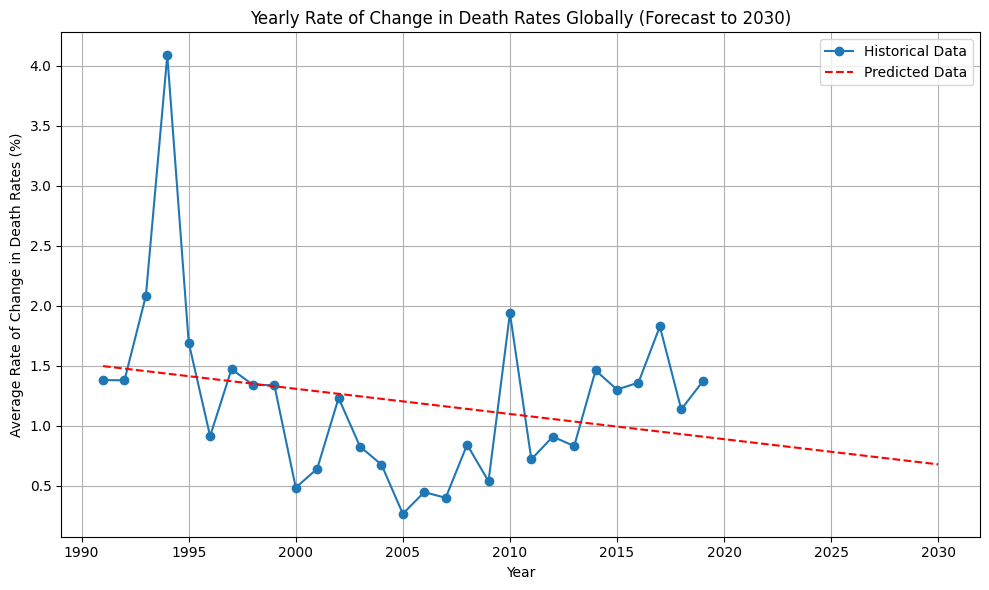

In [35]:
from sklearn.linear_model import LinearRegression

# Calculate the average rate of change per year (your existing code)
avg_rate_change_per_year = deathDS.groupby('Year')['Death_Rate_Change'].mean()
avg_rate_change_per_year = avg_rate_change_per_year.iloc[1:]  # Exclude any unwanted rows

# Prepare data for the linear regression model
years = avg_rate_change_per_year.index.values.reshape(-1, 1)  # Reshape for sklearn compatibility
rates = avg_rate_change_per_year.values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(years, rates)

# Predict death rate changes up to 2030
future_years = np.arange(years.min(), 2031).reshape(-1, 1)
predicted_rates = model.predict(future_years)

# Plot the historical and predicted data
plt.figure(figsize=(10, 6))
plt.plot(avg_rate_change_per_year.index, avg_rate_change_per_year.values, marker='o', label='Historical Data')
plt.plot(future_years, predicted_rates, linestyle='--', color='red', label='Predicted Data')

plt.title('Yearly Rate of Change in Death Rates Globally (Forecast to 2030)')
plt.xlabel('Year')
plt.ylabel('Average Rate of Change in Death Rates (%)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
